In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests
from math import floor

In [2]:
df = pd.read_csv('Apple.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10444,2022-05-16,145.550003,147.520004,144.179993,145.539993,145.539993,86643800
10445,2022-05-17,148.860001,149.770004,146.679993,149.240005,149.240005,78336300
10446,2022-05-18,146.850006,147.360001,139.899994,140.820007,140.820007,109742900
10447,2022-05-19,139.880005,141.660004,136.600006,137.350006,137.350006,136095600
10448,2022-05-20,139.089996,140.699997,132.610001,137.589996,137.589996,137194600


In [4]:
df.shape

(10449, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10449 non-null  object 
 1   Open       10449 non-null  float64
 2   High       10449 non-null  float64
 3   Low        10449 non-null  float64
 4   Close      10449 non-null  float64
 5   Adj Close  10449 non-null  float64
 6   Volume     10449 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 571.6+ KB


In [6]:
df.describe().T.apply(lambda x: x.apply("{0:.3f}".format))

,count,mean,std,min,25%,50%,75%,max
Open,10449.000,14.528,31.483,0.050,0.283,0.473,14.532,182.630
High,10449.000,14.687,31.846,0.050,0.289,0.482,14.619,182.940
Low,10449.000,14.367,31.118,0.049,0.276,0.464,14.341,179.120
Close,10449.000,14.532,31.493,0.049,0.283,0.473,14.505,182.010
Adj Close,10449.000,13.898,31.192,0.038,0.235,0.390,12.556,181.512
Volume,10449.000,331284862.350,338994270.824,0.000,124051200.000,218747200.000,411499200.000,7421640800.000


Data cleaning

In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
# Handle outliers
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['Close'] <= upper_bound]

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.shape

(9164, 7)

# Time series analysis

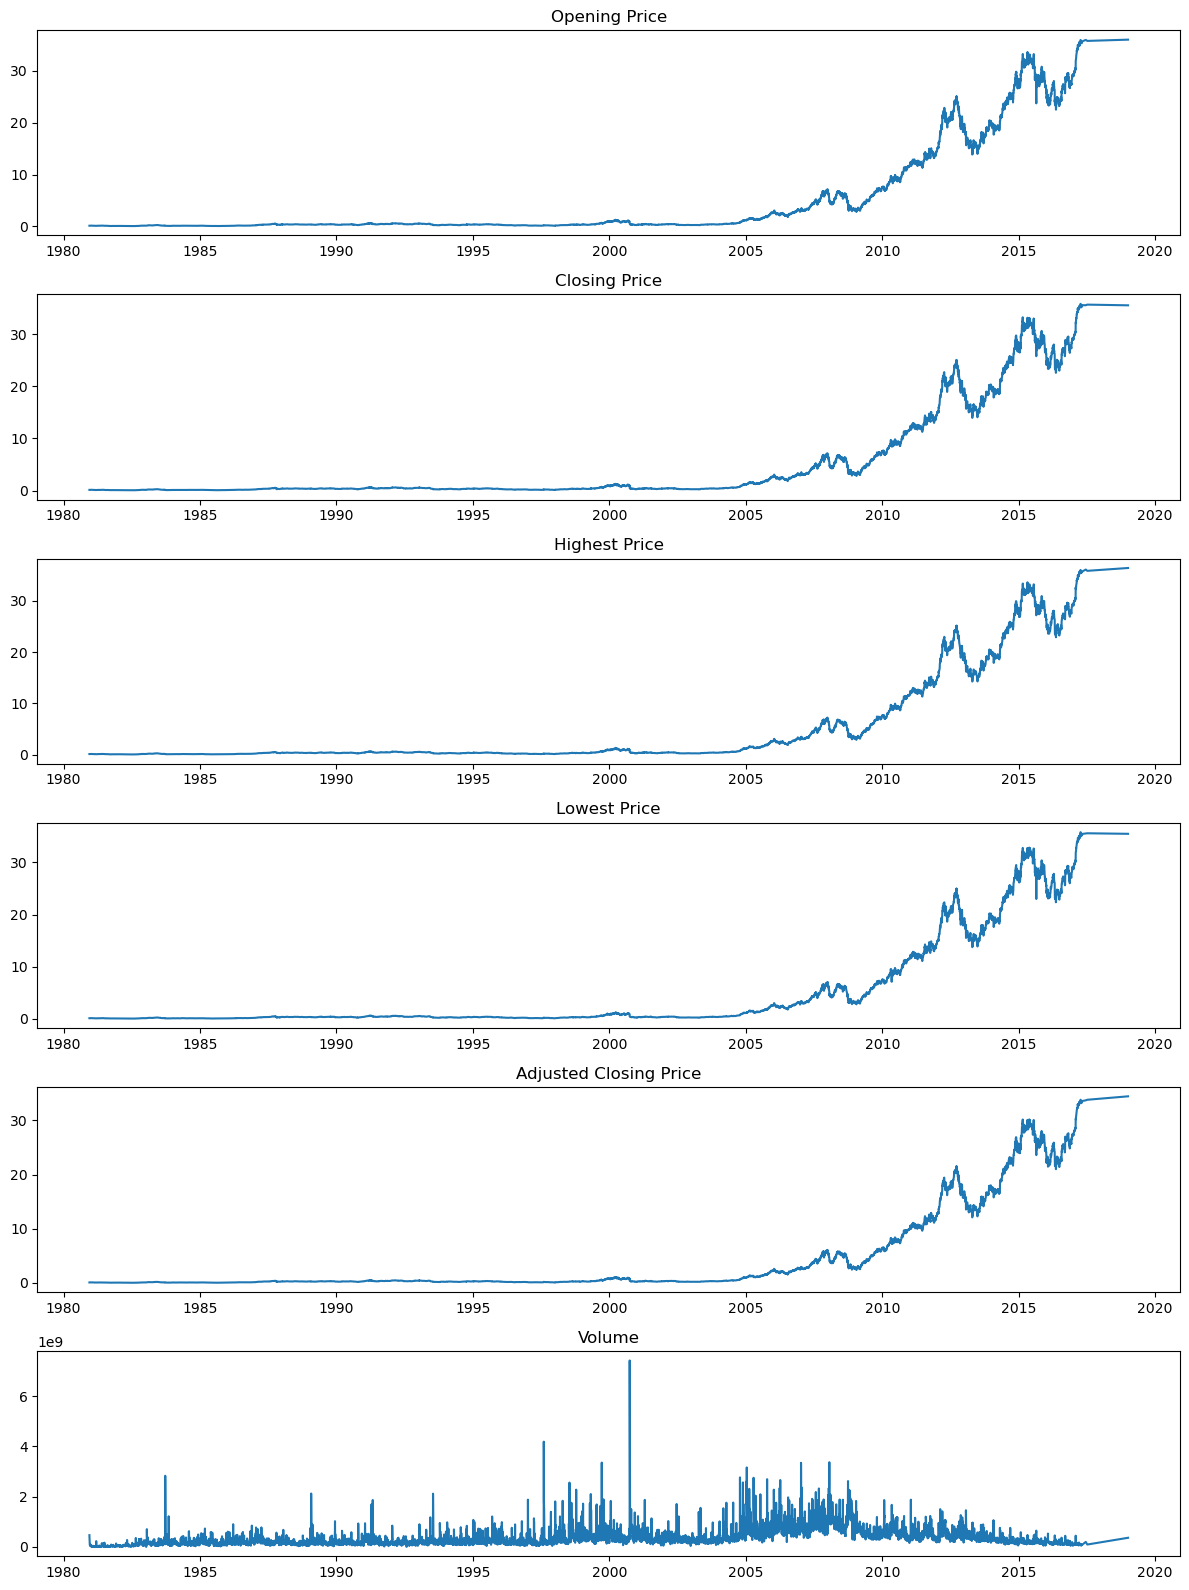

In [12]:
df = df.set_index("Date")
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 16))

# Opening Price
axs[0].plot(df.index, df["Open"])
axs[0].set_title("Opening Price")

# Closing Price
axs[1].plot(df.index, df["Close"])
axs[1].set_title("Closing Price")

# Highest Price
axs[2].plot(df.index, df["High"])
axs[2].set_title("Highest Price")

# Lowest Price
axs[3].plot(df.index, df["Low"])
axs[3].set_title("Lowest Price")

# Adjusted Closing Price
axs[4].plot(df.index, df["Adj Close"])
axs[4].set_title("Adjusted Closing Price")

# Volume
axs[5].plot(df.index, df["Volume"])
axs[5].set_title("Volume")

# Adjust spacing and layout
plt.tight_layout()

# Show the plot
plt.show()

# Data visualisation

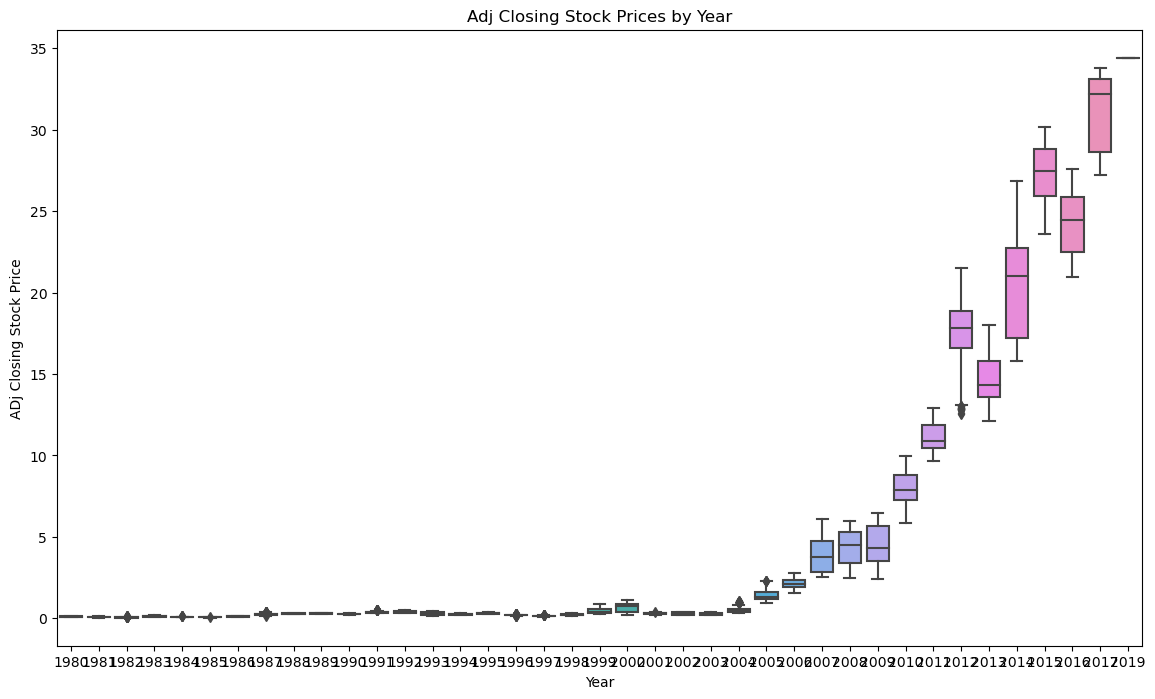

In [18]:
plt.figure(figsize=(14,8))
df['Year'] = df.index.year
sb.boxplot(x='Year', y='Adj Close', data=df)
plt.title('Adj Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('ADj Closing Stock Price')
plt.show()

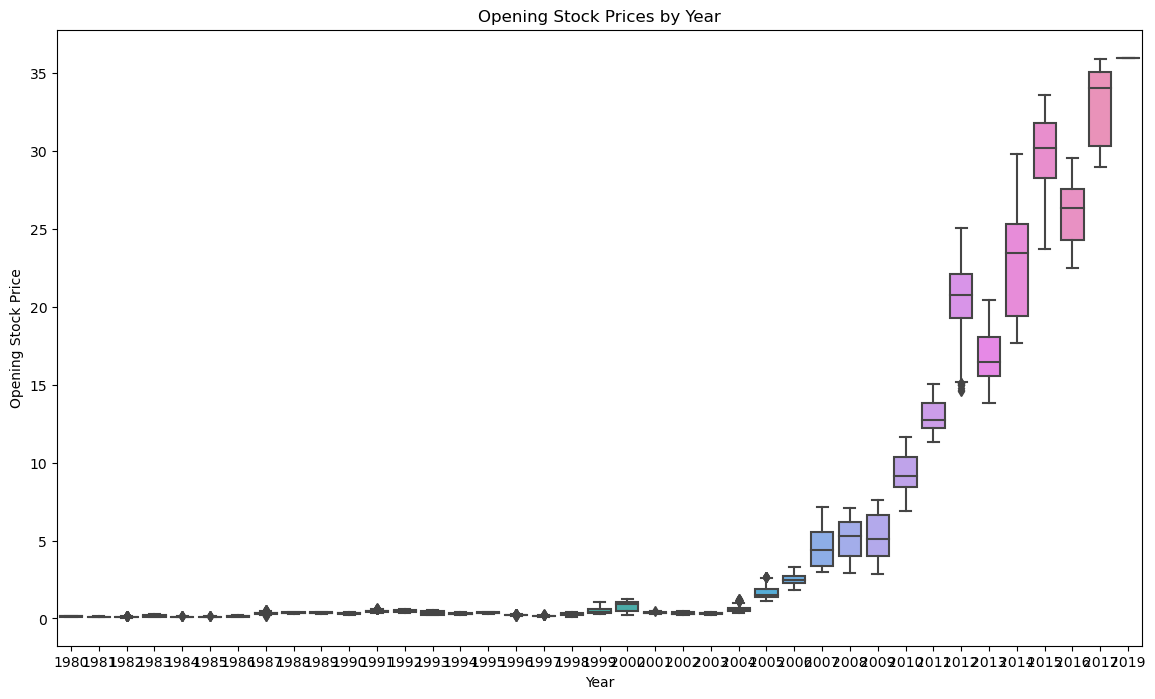

In [15]:
plt.figure(figsize=(14,8))
df['Year'] = df.index.year
sb.boxplot(x='Year', y='Open', data=df)
plt.title('Opening Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Opening Stock Price')
plt.show()

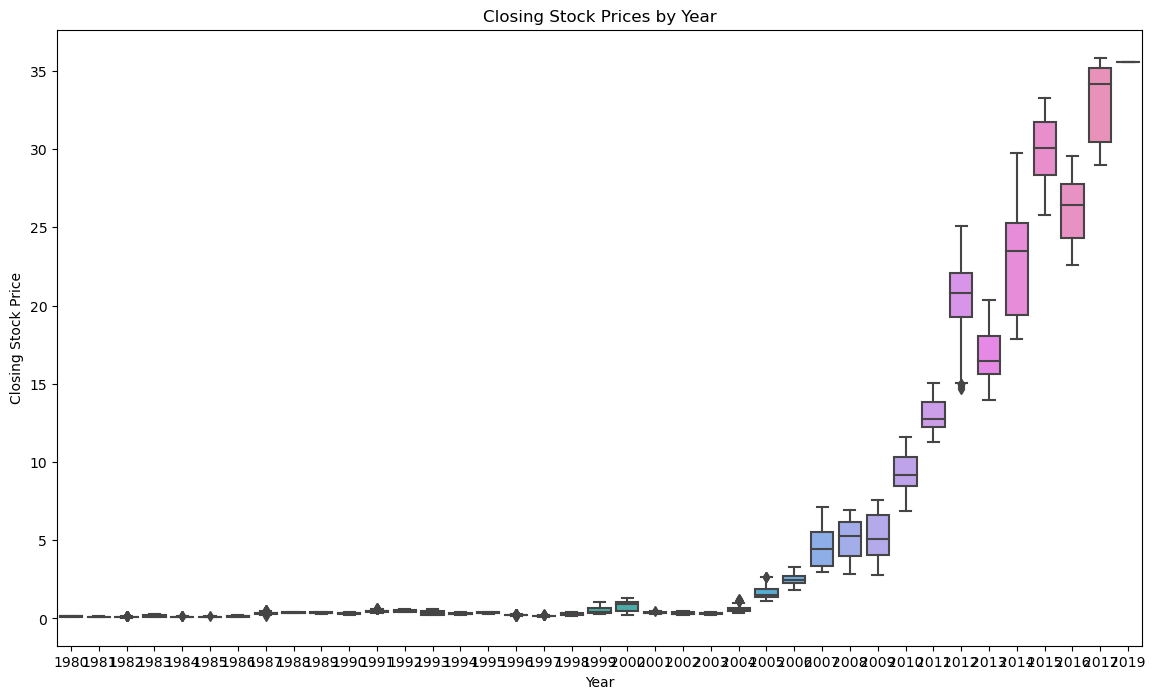

In [20]:
plt.figure(figsize=(14,8))
df['Year'] = df.index.year
sb.boxplot(x='Year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

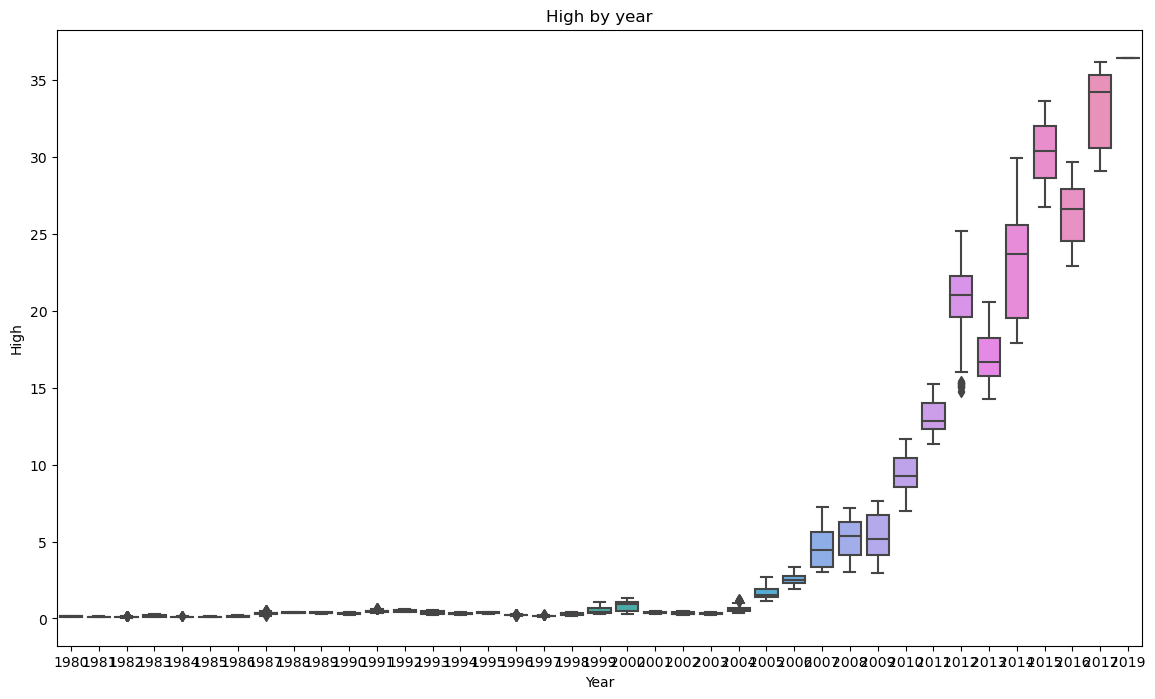

In [23]:
plt.figure(figsize=(14,8))
df['Year'] = df.index.year
sb.boxplot(x='Year', y='High', data=df)
plt.title('High by year')
plt.xlabel('Year')
plt.ylabel('High')
plt.show()

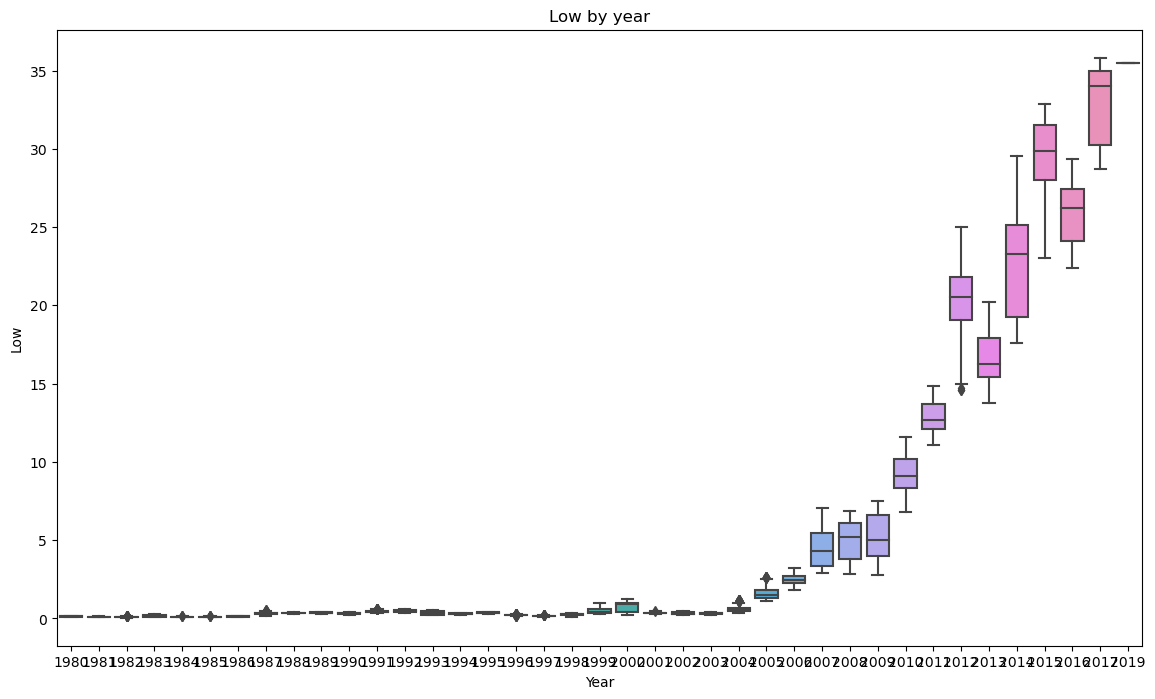

In [24]:
plt.figure(figsize=(14,8))
df['Year'] = df.index.year
sb.boxplot(x='Year', y='Low', data=df)
plt.title('Low by year')
plt.xlabel('Year')
plt.ylabel('Low')
plt.show()

# Correlation analysis

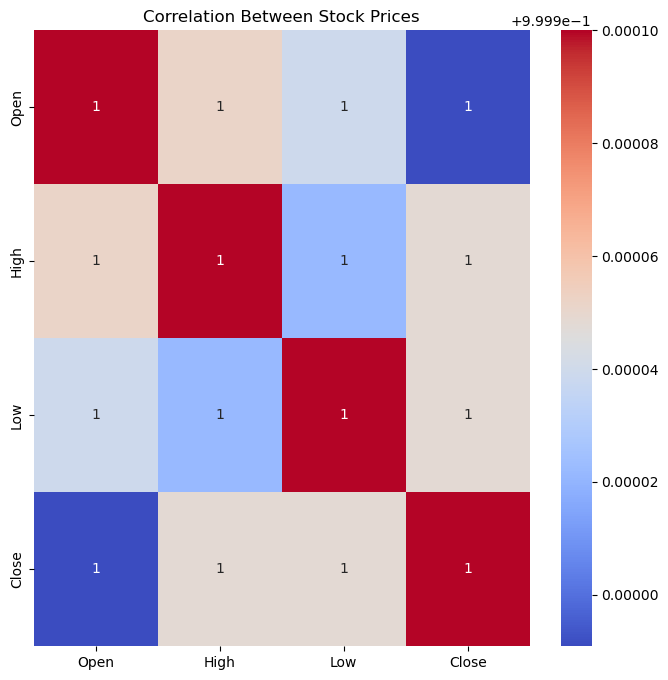

In [19]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()